# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



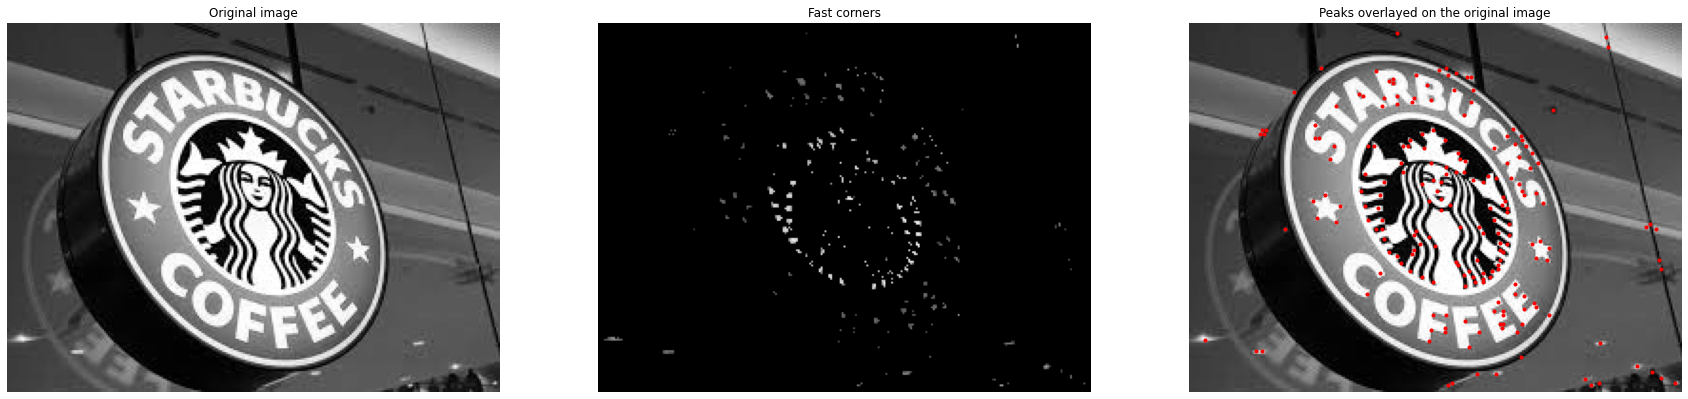

In [ ]:
# solution
image = io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks4.jpg')
img_gray = color.rgb2gray(image)

#corners
fast_corners = feature.corner_fast(img_gray, threshold=0.15)
peaks = feature.corner_peaks(fast_corners)

#visualization
fig, plot = plt.subplots(1,3, figsize=(30,30))

plot[0].imshow(img_gray, cmap='gray')
plot[0].set_title('Original image')
plot[0].axis('off')

plot[1].imshow(fast_corners, cmap='gray')
plot[1].set_title('Fast corners')
plot[1].axis('off')

plot[2].imshow(img_gray, cmap='gray')
plot[2].scatter(peaks[:,1], peaks[:,0], color='red', marker='.' )
plot[2].set_title('Peaks overlayed on the original image')
plot[2].axis('off')

fig.show()

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

Threshold gives us the limit for when to consider that a pixel in a region is brighter or darker than the pixels in its neighbourhood. Therefore, if we want to get more corners we should decrease it, or if we want less, increase it.


*   Repeat the exercise by replacing FAST corners with Harris corners.

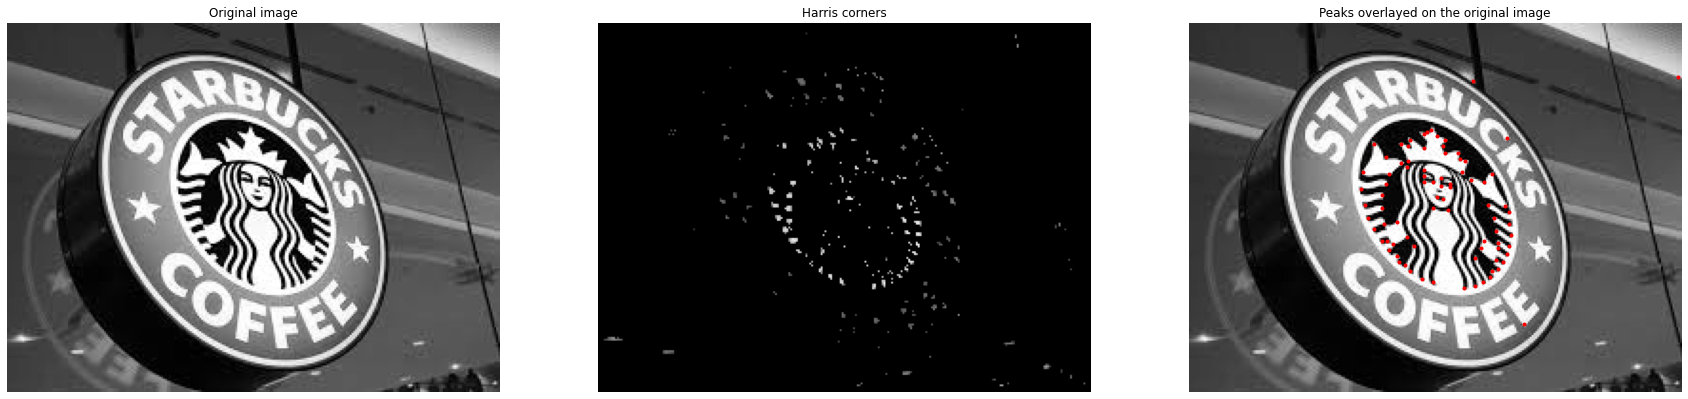

In [ ]:
# solution

#corners
harris_corners = feature.corner_harris(img_gray)
peaks = feature.corner_peaks(harris_corners)

#visualization
fig, plot = plt.subplots(1,3, figsize=(30,30))

plot[0].imshow(img_gray, cmap='gray')
plot[0].set_title('Original image')
plot[0].axis('off')

plot[1].imshow(fast_corners, cmap='gray')
plot[1].set_title('Harris corners')
plot[1].axis('off')

plot[2].imshow(img_gray, cmap='gray')
plot[2].scatter(peaks[:,1], peaks[:,0], color='red', marker='.' )
plot[2].set_title('Peaks overlayed on the original image')
plot[2].axis('off')

fig.show()

*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

With Harris corners we only detect corners in the center of the image, where there is more contrast, whereas with FAST corners we detect corners through all the image.

If we use FAST corners with threshold=0.5, we obtain similar results.

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [ ]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [ ]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [ ]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

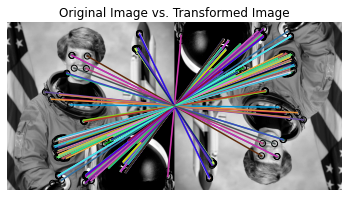

In [ ]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

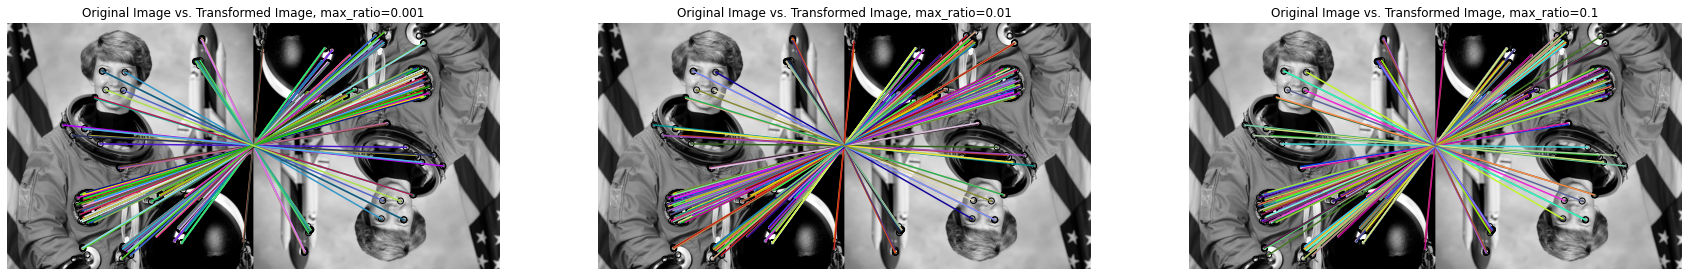

In [ ]:
fig, plot = plt.subplots(1,3, figsize=(30,10))

#change max_ratio

#max_ratio=0.001
matches12_1 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=0.001)
feature.plot_matches(plot[0], img1, img2, keypoints1, keypoints2, matches12_1)
plot[0].axis('off')
plot[0].set_title("Original Image vs. Transformed Image, max_ratio=0.001")

#max_ratio=0.01
matches12_2 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=0.01)
feature.plot_matches(plot[1], img1, img2, keypoints1, keypoints2, matches12_2)
plot[1].axis('off')
plot[1].set_title("Original Image vs. Transformed Image, max_ratio=0.01")

#max_ratio=0.1
matches12_3 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=0.1)
feature.plot_matches(plot[2], img1, img2, keypoints1, keypoints2, matches12_3)
plot[2].axis('off')
plot[2].set_title("Original Image vs. Transformed Image, max_ratio=0.1")

fig.show()

**Solution**

Maximum ratio is the maximum distance between two points to be considered matches. If we want that the matches are only with very similar points, we need this parameter to be close to 0, and the bigger we make it, the less similarity we need to make a match.

In the case of this example, as both images are the same (the only difference is the rotation) we need a very low max_ratio to notice some differences. If we look closely at the images we can see that some matches are not considered when max_ratio=0.001 and when max_ratio=0.01.

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

**harrys_k**: factor of sensity to separate corners from edges. When it is small, we detect more sharp corners.

**n_scales**: maximum number of scales from the bottom of the image pyramid to extract the features from.

**fast_n**: minimum number of pixels in a circle (max 16) that have to be all bright or dark.

**fast_threshold**: parameter to decide if pixels in a circle are brighter, darker or similar.


### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [ ]:
# solution

def get_ORB(img1, img2):
  
  descriptor_extractor.detect_and_extract(img1)
  keypoints1 = descriptor_extractor.keypoints
  descriptors1 = descriptor_extractor.descriptors

  descriptor_extractor.detect_and_extract(img2)
  keypoints2 = descriptor_extractor.keypoints
  descriptors2 = descriptor_extractor.descriptors
  
  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1)

  return keypoints1, keypoints2, matches12


*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

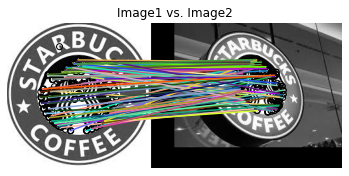

In [ ]:
# solution

image1 = io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks.jpg')
image2 = io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks4.jpg')
image1 = color.rgb2gray(image1)
image2 = color.rgb2gray(image2)

keypoints1, keypoints2, matches12 = get_ORB(image1, image2)

feature.plot_matches(plt, image1, image2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Image1 vs. Image2")
plt.show()

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

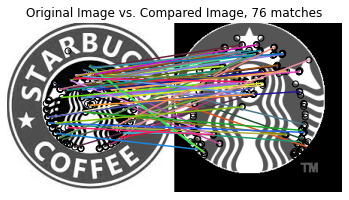

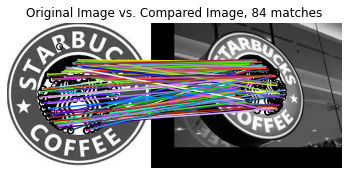

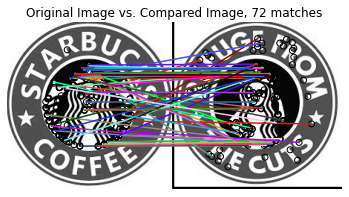

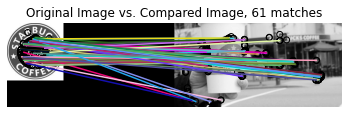

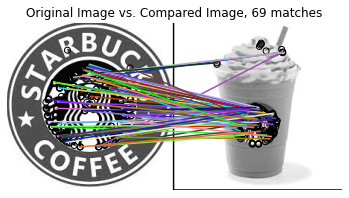

In [ ]:
# solution
image = color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks.jpg'))
images=[]
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks2.png')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks4.jpg')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks5.png')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks6.jpg')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucksCup.jpg')))


i=0
for img in images:
  keypoints1, keypoints2, matches12 = get_ORB(image, img)
  feature.plot_matches(plt, image, img, keypoints1, keypoints2, matches12)
  plt.axis('off')
  plt.title("Original Image vs. Compared Image, " + str(len(matches12)) + " matches")
  plt.show()


*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

In the first pair of images we obtain 76 matches, which is one of the highest, however, not all the points correspond to the ones that would correspond to them.

In the second pair we have more matches, 84, and as before, we have wrong matches, however, it seems that not as many as previously.

In the third pair we have 72 matches, and as the others, we have wrong matches. In this case, we notice several horizontal parallel lines that correspond to matches.

In the fourth pair we only have 61 matches and it is when the algorithm works worse. This is the most difficult case as well, as the logo is in a different hue, in a slightly rotated cup and we have a complex background. We do not have any correct matches.

And the last pair we have 69 matches and most of the matches correspond to the logo.

The algorithm works better in the second pair, because it is where we have more matches and they all go from the center to the center of the logos.

We have seen that we have matches that do not correspond to the ones that they should. To solve this we could try to change some parameters like decreasing max_ratio to make sure that we match more similar points.


### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

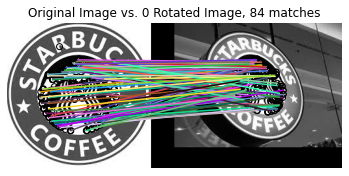

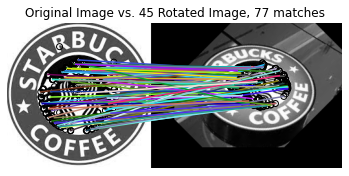

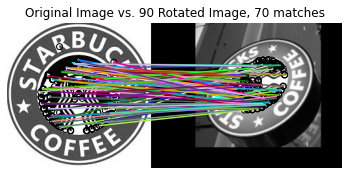

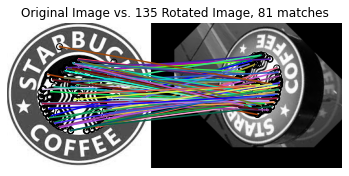

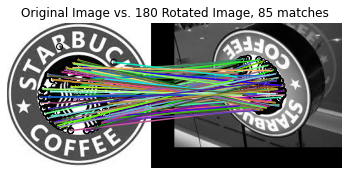

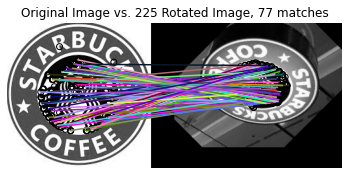

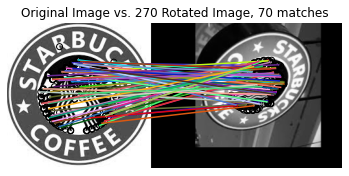

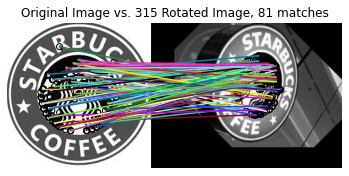

In [ ]:
# solution

for i in(0,45,90,135,180,225,270,315):
  img2 = transform.rotate(image2, i)
  keypoints1, keypoints2, matches12 = get_ORB(image1, img2)
  feature.plot_matches(plt, image1, img2, keypoints1, keypoints2, matches12)
  plt.axis('off')
  plt.title("Original Image vs. " + str(i) + " Rotated Image, " + str(len(matches12)) + " matches")
  plt.show()



*   What do you observe with respect to the change in orientations?

**Solution**

Although it is true that the fact of how the image is orientated changes the number of matches (for example with the image rotated 180 degrees it is capable to detect more matches), in general this difference is not very considerable, therefore ORB detector works well with rotations.


### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

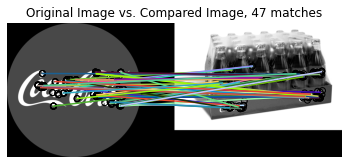

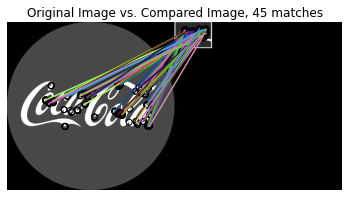

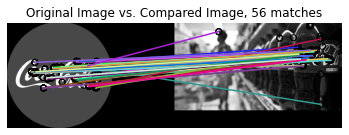

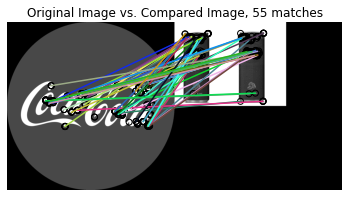

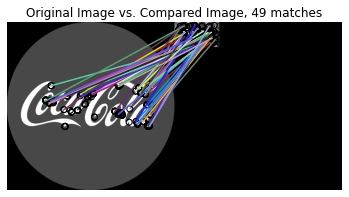

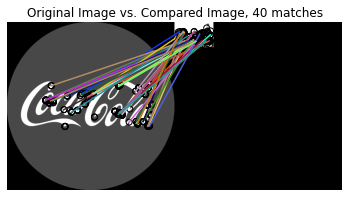

In [ ]:
# solution
image = color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola_logo.png'))
images=[]
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola1.jpg')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola2.png')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola3.jpg')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola4.jpg')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola5.png')))
images.append(color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/cocacola/cocacola6.jpg')))
for img in images:
  keypoints1, keypoints2, matches12 = get_ORB(image, img)
  feature.plot_matches(plt, image, img, keypoints1, keypoints2, matches12)
  plt.axis('off')
  plt.title("Original Image vs. Compared Image, " + str(len(matches12)) + " matches")
  plt.show()


**Solution**

It is not necessary to change any parameters. Setting the number of keypoints=200 is enough, as we find less than 200 matches, the rest of parameters that we can chose are:


---

 _keypointsint, optional
Number of keypoints to be returned. The function will return the best n_keypoints according to the Harris corner response if more than n_keypoints are detected. If not, then all the detected keypoints are returned.

fast_nint, optional
The n parameter in skimage.feature.corner_fast. Minimum number of consecutive pixels out of 16 pixels on the circle that should all be either brighter or darker w.r.t test-pixel. A point c on the circle is darker w.r.t test pixel p if Ic < Ip - threshold and brighter if Ic > Ip + threshold. Also stands for the n in FAST-n corner detector.

fast_thresholdfloat, optional
The threshold parameter in feature.corner_fast. Threshold used to decide whether the pixels on the circle are brighter, darker or similar w.r.t. the test pixel. Decrease the threshold when more corners are desired and vice-versa.

harris_kfloat, optional
The k parameter in skimage.feature.corner_harris. Sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.

downscalefloat, optional
Downscale factor for the image pyramid. Default value 1.2 is chosen so that there are more dense scales which enable robust scale invariance for a subsequent feature description.

n_scalesint, optional
Maximum number of scales from the bottom of the image pyramid to extract the features from.

---

We do not see why these parameters should improve the results.

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

ORB is able to deal with rotations, changes in size and as it calculates matches locally we can also have occlusions and changes in shapes/poses.

Therefore, we do not need to have images with very similar properties to detect matches.

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

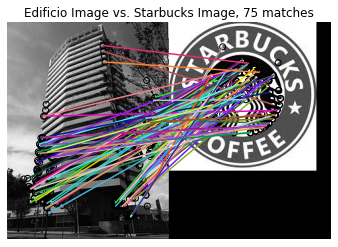

In [ ]:
# solution
image = io.imread('/content/drive/MyDrive/CV5/images/edificio.jpg')
image = color.rgb2gray(image)
imageStarbucks = color.rgb2gray(io.imread('/content/drive/MyDrive/CV5/images/starbucks/starbucks.jpg'))
keypoints1, keypoints2, matches12 = get_ORB(image, imageStarbucks)
feature.plot_matches(plt, image, imageStarbucks, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Edificio Image vs. Starbucks Image, " + str(len(matches12)) + " matches")
plt.show()

**Solution**

When there are not similar pairs of points it matches points with similar edges but they do not have anything in common. To solve this we could change the max_ratio parameter in the definition of get_ORB function.

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

One way of measuring the quality of the correspondence between two images could be by difining a ratio between the keypoints that should be matched and the ones that are matched. Then, we could calculate a ratio of when the template is rotated, or with larger scales, or with brightness changes.

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **Monday, the 8th of November, 2021**
